In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
dataset = pd.read_csv('15min_dataset.csv')
y = np.array(dataset['Y'])

X = np.array(dataset.drop(columns=['Y']))

In [4]:
print(y)
print(X)

[4878.5  4878.5  4878.5  ... 6691.93 6707.73 6704.8 ]
[[4878.5  4879.   4878.   4878.5  4875.53]
 [4878.   4880.   4877.5  4878.5  4875.53]
 [4879.   4879.   4876.   4878.   4875.51]
 ...
 [6704.8  6713.58 6702.46 6707.73 6660.98]
 [6690.76 6709.49 6690.76 6704.8  6660.27]
 [6697.2  6698.95 6687.25 6691.35 6659.32]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [13]:
GBR = GradientBoostingRegressor()
parameters ={'learning_rate': [0.01,0.02,0.03],
                'subsample'    : [0.9, 0.5, 0.2],
                'n_estimators' : [100,500,1000],
                'max_depth'    : [4,6,8]}

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_GBR.fit(X_train, y_train)

print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 The best score across ALL searched params:
 -7.03895658253884

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}


In [16]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9995209457525147
0.9994349814020336


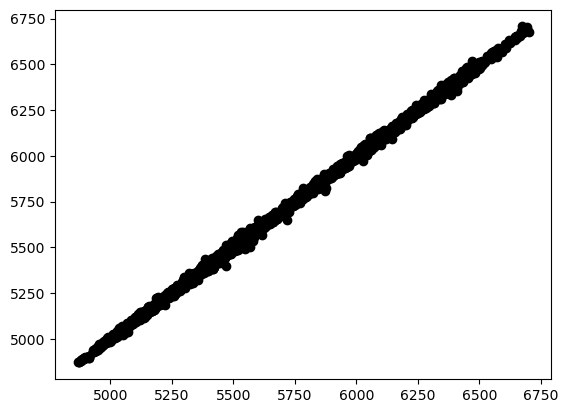

In [7]:
y_pred = rf.predict(X_test)

plt.scatter(y_test, y_pred, color ='k')
plt.show()

In [10]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)

MSE:  108.97216157537405
MAE:  7.472715276944576
